# Stack Overflow Survey Analysis

### Introduction

In this notebook ,we will analyze **Stack Overflow Survey** data.Every year, Stack Overflow conducts a massive survey of people on it’s website, covering all sorts of information like programming languages, jobs, code style and more.This data is 'the largest and most comprehensive survey of software developers'.


### (Project Overview and Problem Statement)

**In this notebook we will try to answer the following questions:**
  - Which are the most popular langauges over the years?(from 2011 to 2019)
  - Based on 2019 survey results,does the age of developers influence which programming languages they know or want to learn?
  - Based on 2019 survey results, What influence the job satisfaction of developers and How satisfied will they be ?(We will predict)

In [612]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

%matplotlib inline

### Load and read data

In [26]:
#read 2011 Stack Overflow Survey Results
with open("data/2011 Stack Overflow Survey Results.csv", 'rb') as f:
    rslt_2011 = chardet.detect(f.read())
    
# read 2012 Stack Overflow Survey Results
with open("data/2012 Stack Overflow Survey Results.csv", 'rb') as f:
    rslt_2012 = chardet.detect(f.read())

In [417]:
# read all files for each year
data_2011 = pd.read_csv("data/2011 Stack Overflow Survey Results.csv", encoding = rslt_2011['encoding'], low_memory=False)
data_2012 = pd.read_csv("data/2012 Stack Overflow Survey Results.csv", encoding = rslt_2012['encoding'], low_memory=False)
data_2013 = pd.read_csv("data/2013 Stack Overflow Survey Results.csv", low_memory=False)
data_2014 = pd.read_csv("data/2014 Stack Overflow Survey Results.csv", low_memory=False)
data_2015 = pd.read_csv("data/2015 Stack Overflow Survey Results.csv", header=1, low_memory=False)
data_2016 = pd.read_csv("data/2016 Stack Overflow Survey Results.csv", low_memory=False)
data_2019 = pd.read_csv("data/2019 Stack Overflow Survey Results.csv" , low_memory=False)
data_2018 = pd.read_csv("data/2018 Stack Overflow Survey Results.csv" , low_memory=False)
data_2017 = pd.read_csv("data/2017 Stack Overflow Survey Results.csv" , low_memory=False)

### Which are the most popular langauges over the years?(from 2011 to 2019) ?

In [678]:
def clean_pop_lng(series,year,length = 2):
    """
    clean 2019,2018,2017,2016 data
    
    inputs:
    series:The column which contains language in which developer worked with.
    year: year of data 
    length: select the top n popular languages to output
    
    output:
    df : contains Language and its Count field
    """
    l = series.fillna("Nil").apply(lambda x : x.split(";")).to_list()
    flat_list = [item for sublist in l for item in sublist]
    df = pd.DataFrame(pd.Series(flat_list).value_counts().head(length),columns =["Count"]).reset_index().rename(columns={"index":"Language"})
    df.drop(df[df['Language'] == "Nil" ].index , inplace=True)
    df["Year"] = year
    return (df)

def clean_pop_lng2(dataframe,columns,year,passs =False):
    """
    clean 2015,2014,2013,2012,2011 data
    
    inputs:
    series:The columns which contains language in which developer worked with.
    year: year of data 
    passs: selection varaiable for 2015 data specific cleaning
    
    output:
    df : contains Language and its Count field
    """
    
    df = pd.DataFrame(columns = ["Count"])
    for col in columns:
        if "Current Lang & Tech:" in col or passs ==True:
            dict_lang = dataframe[col].value_counts().to_dict()
            df.loc[list(dict_lang.keys())[0]] = dict_lang[list(dict_lang.keys())[0]]
    df = df.sort_values(by = "Count" ,ascending =False).reset_index().rename(columns={"index":"Language"}) 
    df["Year"] = year
    return(df.head(2))

def clean_pop_lng3(x):
    """
    clean double entry languages
    """
    if "JavaScript" in x:
        return "JavaScript"
    if "Java" in x:
        return "Java"
    if "SQL" in x:
        return "SQL"
    if "HTML" in x or "CSS" in x:
        return "HTML/CSS"
    else:
        return x


most_pop_lng_df = pd.DataFrame(columns=["Language","Count","Year"])

#concat each years data to "most_pop_lng_df"
most_pop_lng_df = pd.concat([most_pop_lng_df,clean_pop_lng(data_2019.LanguageWorkedWith,2019)])
most_pop_lng_df = pd.concat([most_pop_lng_df,clean_pop_lng(data_2018.LanguageWorkedWith,2018)])
most_pop_lng_df = pd.concat([most_pop_lng_df,clean_pop_lng(data_2017.HaveWorkedLanguage,2017)])
most_pop_lng_df = pd.concat([most_pop_lng_df,clean_pop_lng(data_2016.tech_do,2016)])
most_pop_lng_df = pd.concat([most_pop_lng_df,clean_pop_lng2(data_2015,data_2015.columns,2015)])
most_pop_lng_df = pd.concat([most_pop_lng_df,clean_pop_lng2(data_2014,data_2014.iloc[:,42:54].columns,2014,True)])
most_pop_lng_df = pd.concat([most_pop_lng_df,clean_pop_lng2(data_2013,data_2013.iloc[:,56:69].columns,2013,True)])
most_pop_lng_df = pd.concat([most_pop_lng_df,clean_pop_lng2(data_2012,data_2012.iloc[:,22:35].columns,2012,True)])
most_pop_lng_df = pd.concat([most_pop_lng_df,clean_pop_lng2(data_2011,data_2011.iloc[:,30:41].columns,2011,True)])

most_pop_lng_df.reset_index(drop =True,inplace =True)

#clean double entry languages
most_pop_lng_df.Language = most_pop_lng_df.Language.apply(clean_pop_lng3)
most_pop_lng_df

,Language,Count,Year
0,JavaScript,59219,2019
1,HTML/CSS,55466,2019
2,JavaScript,54686,2018
3,HTML/CSS,53628,2018
4,SQL,18466,2017
5,JavaScript,17159,2017
6,JavaScript,22606,2016
7,SQL,21664,2016
8,JavaScript,11962,2015
9,SQL,9439,2015


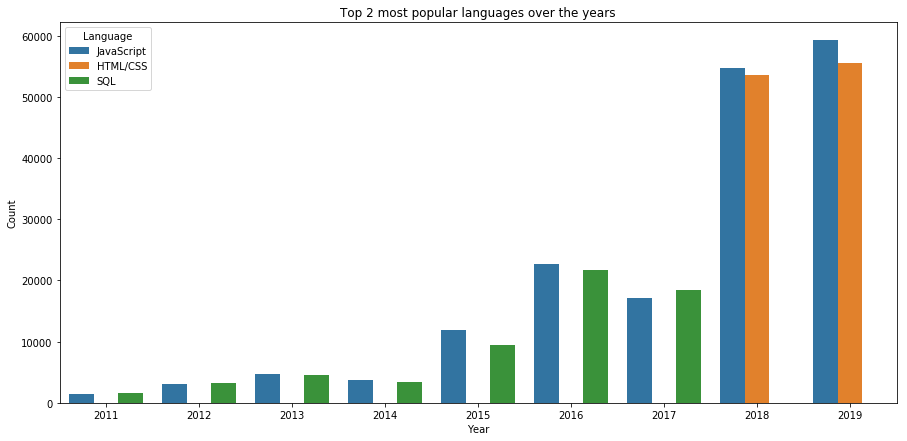

In [679]:
#plot the chart
plt.figure(figsize =(15,7))
sns.barplot(x = most_pop_lng_df.Year ,y =most_pop_lng_df.Count ,hue=most_pop_lng_df.Language )
plt.title("Top 2 most popular languages over the years")
plt.show()

#### Key Observations:
> - **JavaScript** have the most popular language over the year expect in 2017 and gained more number of deveoplers
  - **SQL** is not far behind JavaScript util 2017.
  - **HTML/CSS** saw a huge rise in popularity from 2018
  - Overall popularity of all languages incresed over year

###  Based on 2019 survey results,does the age of developers influence which programming languages they know or want to learn?

In [691]:
def plot_age_lang(df,col):
    
    languages = ["HTML/CSS","JavaScript","Python","Java",
                 "C++","Bash/Shell/PowerShell","C#","PHP","SQL","C","TypeScript"]
    df.Age = df.Age.round()
    df[col] = df[col].fillna("Nil")
    
    for lang in languages:
        df[lang] = df[col].apply(lambda x : 1 if lang in x else 0)
    df = df[["Age"]+languages].groupby("Age").sum()
    df = df.loc[19:50]
    
    df.loc[19:50].plot(figsize=(20,7), kind='line', colormap='nipy_spectral')
    if col == "LanguageWorkedWith":
        plt.title("Most Popular Languages worked with among 18-50 age range")
    else:
         plt.title("Most Popular Languages Desire for next year among 18-50 age range")
    plt.ylabel("Count")

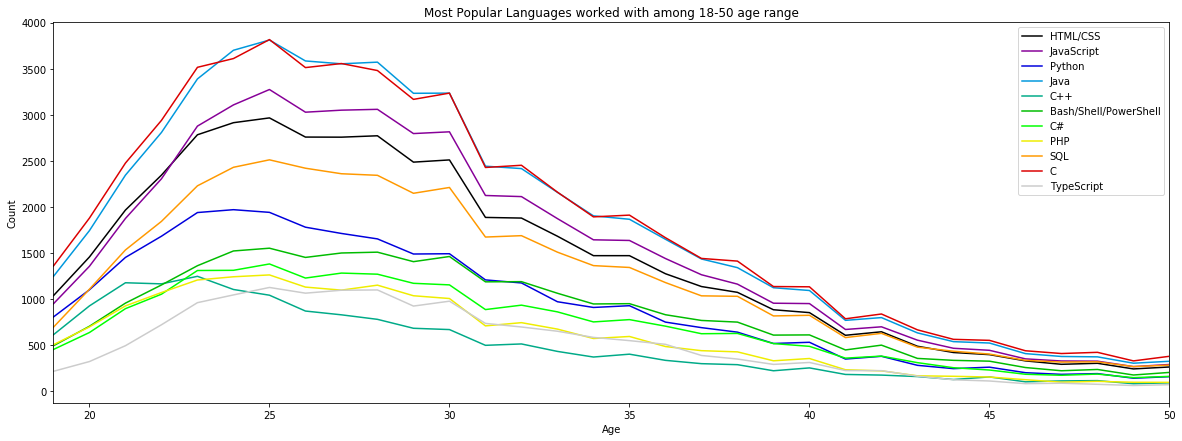

In [692]:
plot_age_lang(data_2019,"LanguageWorkedWith")

#### Key Observations:
> - **Bash/Shell/PowerShell** is th 4th most popular language among above 30 age groups,but it drops among youngsters.
  - **Python** seems to be more popular among youngesters.
  - **C and C++** seems to be a freshers language.

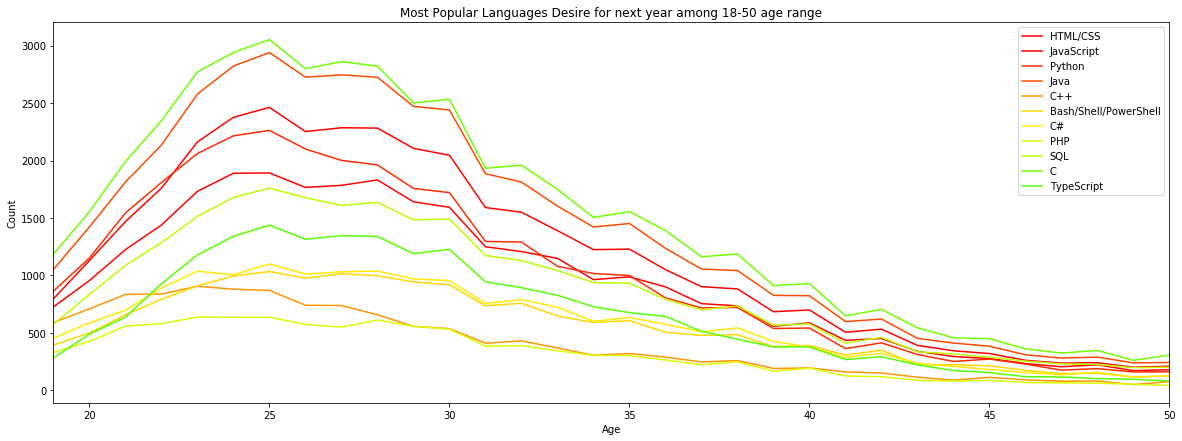

In [686]:
plot_age_lang(data_2019,"LanguageDesireNextYear" )

#### Key Observations:
> - **TypeScript** is being the 5th most popular language among older groups,but least among youngsters.
  - **Python** seems to be most  desirable among youngesters ,which overtakes JavaScript

### Based on 2019 survey results, What influence the job satisfaction of developers and How satisfied will they be ?(We will predict)

In [618]:
model_data = data_2019[["OrgSize","Age","Country","WorkChallenge",
                        "Gender","DevType","YearsCodePro","BetterLife","JobSat"]]

In [549]:
model_data.isna().sum()

OrgSize          17092
Age               9673
Country            132
WorkChallenge    20742
Gender            3477
DevType           7548
YearsCodePro     14552
BetterLife        2614
JobSat           17895
dtype: int64

In [560]:
model_data.Age.describe()

count    79210.000000
mean        30.336699
std          9.178390
min          1.000000
25%         24.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

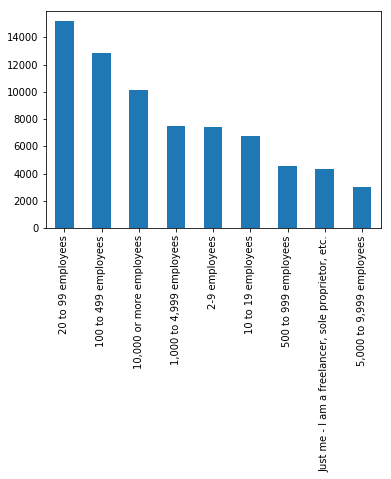

In [550]:
# explore organisation size distribution
model_data.OrgSize.value_counts().plot.bar()

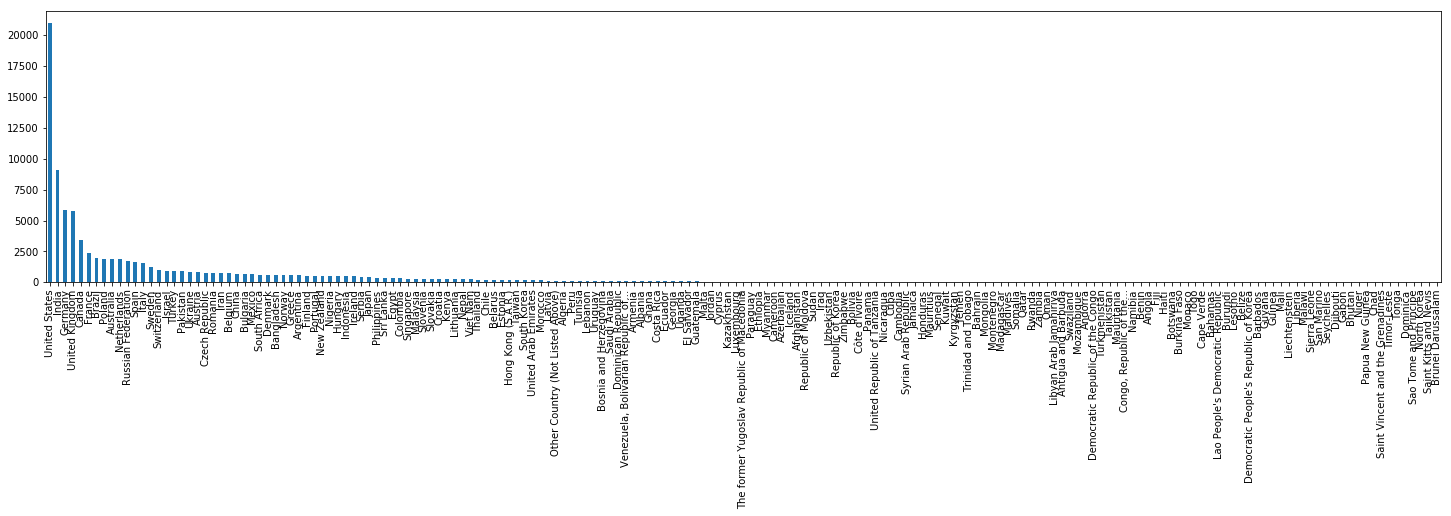

In [551]:
plt.figure(figsize =(25,5))
model_data.Country.value_counts().plot.bar()
plt.show()

In [554]:
model_data.Gender.value_counts()

Man                                                            77919
Woman                                                           6344
Non-binary, genderqueer, or gender non-conforming                597
Man;Non-binary, genderqueer, or gender non-conforming            181
Woman;Non-binary, genderqueer, or gender non-conforming          163
Woman;Man                                                        132
Woman;Man;Non-binary, genderqueer, or gender non-conforming       70
Name: Gender, dtype: int64

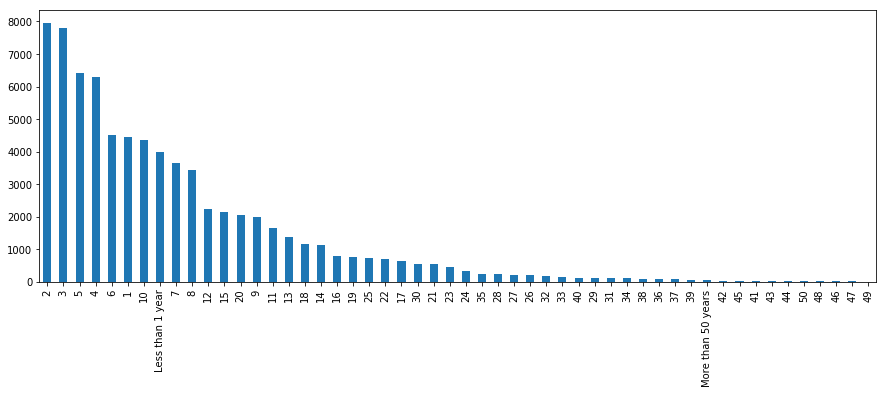

In [553]:
plt.figure(figsize =(15,5))
model_data.YearsCodePro.value_counts().plot.bar()

In [544]:
model_data.BetterLife.value_counts()

Yes    42102
No     25214
Name: BetterLife, dtype: int64

### Data Cleaning

In [619]:
def transform_gender(x):
    #gender
    if "Non-binary" in x or ";" in x:
        return "Other"
    else:
        return x


def clean_data(df):
    
    # drop Nans in Job-satisfaction column
    df.dropna(subset=["JobSat"] , inplace =True)
    
    # drop Nans in Company size column
    df.dropna(subset=["OrgSize"] , inplace =True)
    
    df = df[df.Age>=18]
    df.Age.fillna(df.Age.median(),inplace=True)
    
    # fill Nans and clean gender column
    df.Gender.fillna("Other",inplace=True)
    df.Gender = df.Gender.apply(transform_gender)
    
    #clean devType column and dummied it
    df.DevType.fillna("Nil",inplace=True)
    l = df.DevType.apply(lambda x : x.split(";")).to_list()
    flat_list = [item for sublist in l for item in sublist]
    for dev in pd.Series(flat_list).unique():
        df[dev] = df.DevType.apply(lambda x : 1 if dev in x else 0)
    df.drop(["DevType","Nil"],axis =1 ,inplace =True)
    
    #clean Work challege column and dummied it
    df.WorkChallenge.fillna("Nil",inplace=True)
    l = df.WorkChallenge.apply(lambda x : x.split(";")).to_list()
    flat_list = [item for sublist in l for item in sublist]
    for chall in pd.Series(flat_list).unique():
        df[chall] = df.WorkChallenge.apply(lambda x : 1 if dev in x else 0)
    df.drop(["WorkChallenge"],axis =1 ,inplace =True)
    
    #fill nans with "No opinion" in Better Life
    df.BetterLife.fillna("No opinion",inplace =True)                                       
    
    #transform and clean Years of coding column
    df.YearsCodePro = df.YearsCodePro.replace("Less than 1 year",0)
    df.YearsCodePro = df.YearsCodePro.replace("More than 50 years",55)
      #fill Nans with median
    df[(df.YearsCodePro!=0)&(df.YearsCodePro!=55)&
           (df.YearsCodePro.isna()==False)].YearsCodePro.astype(int).median()
    df.YearsCodePro.fillna(median_YearsCodePro,inplace =True)
    
    #label encode JobSat
    le = LabelEncoder()
    df.JobSat = le.fit_transform(df.JobSat)
    
    #dummied other object type columns
    df = pd.get_dummies(df)
    
    return df
  

In [620]:
a = clean_data(model_data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\ipykern

In [625]:
y = a.pop("JobSat")
X = a.copy()

In [657]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

In [632]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y)

In [633]:
Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape

((47295, 270), (47295,), (15765, 270), (15765,))

In [638]:
rf = RandomForestClassifier()

In [652]:
gbc = LogisticRegression()

In [663]:
 pipeline = Pipeline([
        ('tfidf', StandardScaler()),
        ('clf', LogisticRegression())
    ])

In [664]:
pipeline.fit(Xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
     steps=[('tfidf', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [639]:
rf.fit(Xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [665]:
ypred = pipeline.predict(Xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [656]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.30      0.01      0.02      1838
           1       0.25      0.01      0.02      2360
           2       0.36      0.61      0.45      5401
           3       0.50      0.00      0.00      1075
           4       0.41      0.52      0.46      5091

   micro avg       0.38      0.38      0.38     15765
   macro avg       0.36      0.23      0.19     15765
weighted avg       0.36      0.38      0.31     15765



In [666]:
accuracy_score(ytest, ypred)

0.37716460513796385